# Independet Component Analysis with Nilearn (depressiv subjects)

In [1]:
from nilearn.decomposition import CanICA
from nilearn.plotting import plot_prob_atlas
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show, plot_prob_atlas, plot_matrix, plot_connectome, find_probabilistic_atlas_cut_coords



/home/jt/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Data import

We are working with 2 different datasets, so we created a list with the corresponding files. We exluded 3 subjects, subject 17, 39 and 48 because of to much movement or artefacts.

In [2]:
files_list=[]
all_list=list(range(1,73))
healthy_list=list(range(52,73))
dep_list=list(range(1,52))
exclution_list=[17,39,48]
for i in dep_list:
    if i not in exclution_list:
        j="{:02d}".format(i)
        files_list.append("/media/jt/Daten1/preproc/datasink/smooth/sub-"+j+"/task-restingstatewithclosedeyes/fwhm-8_swarsub-"+j+"_task-rest_bold.nii")
    

Checking the subject list if everything worked well. In this case we are working with the depressiv group.

In [24]:
for i in files_list:
    print (i)

/media/jt/Daten1/preproc/datasink/smooth/sub-01/task-restingstatewithclosedeyes/fwhm-8_swarsub-01_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-02/task-restingstatewithclosedeyes/fwhm-8_swarsub-02_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-03/task-restingstatewithclosedeyes/fwhm-8_swarsub-03_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-04/task-restingstatewithclosedeyes/fwhm-8_swarsub-04_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-05/task-restingstatewithclosedeyes/fwhm-8_swarsub-05_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-06/task-restingstatewithclosedeyes/fwhm-8_swarsub-06_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-07/task-restingstatewithclosedeyes/fwhm-8_swarsub-07_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-08/task-restingstatewithclosedeyes/fwhm-8_swarsub-08_task-rest_bold.nii
/media/jt/Daten1/preproc/datasink/smooth/sub-09/task-restingstat

## Run ICA

Now we are running the ICA (indipendent component analysis with 20 different components. We made this twice, once with the depressiv group and once with the healthy control group.

In [12]:
canica = CanICA(n_components=20,
                memory="/media/jt/Daten1/preproc/ICA_nilearn/nilearn_cache", memory_level=2,
                verbose=10,
                smoothing_fwhm=8,
                n_jobs=-2,
                mask_strategy='template',
                random_state=0)
canica.fit(files_list)

# Retrieve the independent components in brain space. Directly
# accesible through attribute `components_img_`.
canica_components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
canica_components_img.to_filename('//media/jt/Daten1/preproc/ICA_nilearn/canica_resting_state_dep.nii.gz')

[MultiNiftiMasker.fit] Loading data from [/media/jt/Daten1/preproc/datasink/smooth/sub-01/task-restingstatewithclosedeyes/fwhm-8_swarsub-01_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-02/task-restingstatewithclosedeyes/fwhm-8_swarsub-02_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-03/task-restingstatewithclosedeyes/fwhm-8_swarsub-03_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-04/task-restingstatewithclosedeyes/fwhm-8_swarsub-04_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-05/task-restingstatewithclosedeyes/fwhm-8_swarsub-05_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-06/task-restingstatewithclosedeyes/fwhm-8_swarsub-06_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-07/task-restingstatewithclosedeyes/fwhm-8_swarsub-07_task-rest_bold.nii,
 /media/jt/Daten1/preproc/datasink/smooth/sub-08/task-restingstatewithclosedeyes/fwhm-8_swarsub-08_task-rest_bold.nii,
 /media

/home/jt/.local/lib/python3.8/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 0.71s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001254, ...,  0.00049 ],
       ...,
       [ 0.00032 , ..., -0.002165]]), n_components=20, transpose=True, random_state=0, n_iter=3)


/home/jt/.local/lib/python3.8/site-packages/nilearn/decomposition/multi_pca.py:180: UserWarning: Persisting input arguments took 2.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  components_, self.variance_, _ = self._cache(


__________________________________________________randomized_svd - 11.6s, 0.2min


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 out of  10 | elapsed:    1.2s remaining:    2.9s
[Parallel(n_jobs=-2)]: Done   5 out of  10 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=-2)]: Done   7 out of  10 | elapsed:    1.6s remaining:    0.7s
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    1.8s finished
/home/jt/.local/lib/python3.8/site-packages/nilearn/image/image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


In case you don't make this whole script in one time you can start here now loading the created ICA file to continue.

In [3]:
# Only run for plotting without processing or further processing of the ICA data without CanICA them again
canica_components_img="/media/jt/Daten1/preproc/ICA_nilearn/canica_resting_state_dep.nii.gz"

## ICA plotting

Here we plot the calculated components by CanICA.

/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2825: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/home/jt/.local/lib/python3.8/site-packages/nilearn/plotting/displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/jt/.local/lib/python3.8/site-packages/nilearn/plotting/displays.py:101: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),


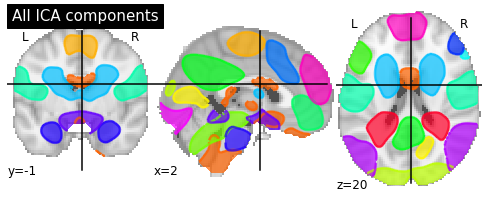

In [14]:
# Plot all ICA components together
plot_prob_atlas(canica_components_img, title='All ICA components')

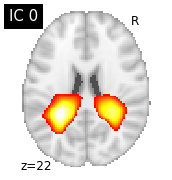

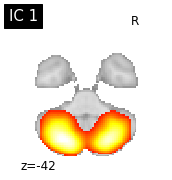

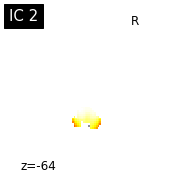

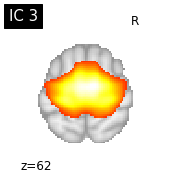

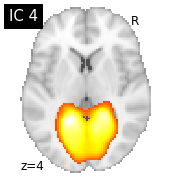

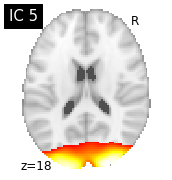

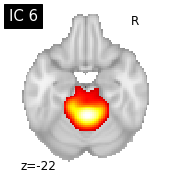

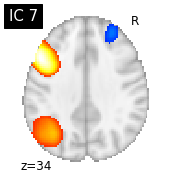

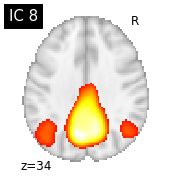

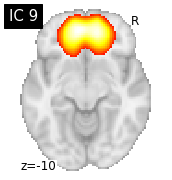

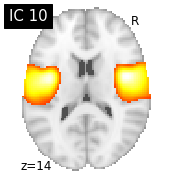

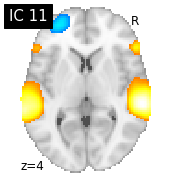

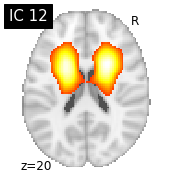

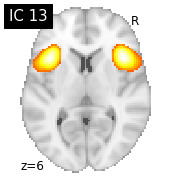

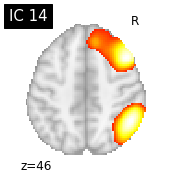

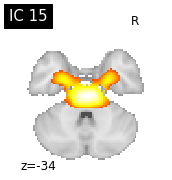

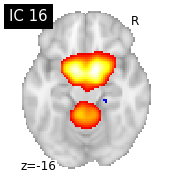

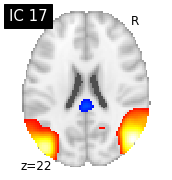

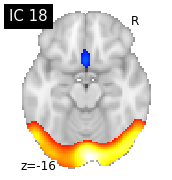

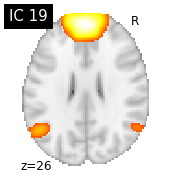

In [15]:
#plot the different slices of components
for i, cur_img in enumerate(iter_img(canica_components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

## Region extraction

Next step is to extract the different regions of the 20 components. Therefore we used the nilearn region extractor with a min region size of 2000. That corresponds to about 100 voxel (2x2x5mm voxel size). 

In [4]:
components_img=canica_components_img

/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/home/jt/.local/lib/python3.8/site-packages/nilearn/image/image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(
/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2825: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/home/jt/.local/lib/python3.8/site-packages/nilearn/plotting/displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/jt/.local/lib/python3.8/site-packages/nilearn/plotting/displays.py:101: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy()

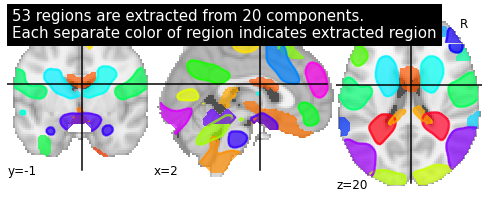

In [5]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor
from nilearn import datasets

atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']

extractor = RegionExtractor(components_img, threshold=1.0,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=2000)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

# Visualization of region extraction results
title = ('%d regions are extracted from %d components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 20))
plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

## Timeseries extraction

Now we are ready to extract the different timeseries of the subjects.

In [6]:
# First we need to do subjects timeseries signals extraction and then estimating
# correlation matrices on those signals.
# To extract timeseries signals, we call transform() from RegionExtractor object
# onto each subject functional data stored in files_list.
# To estimate correlation matrices we import connectome utilities from nilearn
from nilearn.connectome import ConnectivityMeasure

correlations = []
# Initializing ConnectivityMeasure object with kind='correlation'
connectome_measure = ConnectivityMeasure(kind='correlation')
for filename in files_list:
    # call transform from RegionExtractor object to extract timeseries signals
    timeseries_each_subject = extractor.transform(filename)
    # call fit_transform from ConnectivityMeasure object
    correlation = connectome_measure.fit_transform([timeseries_each_subject])
    # saving each subject correlation to correlations
    correlations.append(correlation)

# Mean of all correlations
import numpy as np
mean_correlations = np.mean(correlations, axis=0).reshape(n_regions_extracted,
                                                          n_regions_extracted)

## Atlas import

Importing the atlas for labeling the matrices later.

In [7]:
from nilearn import image
from nilearn import input_data
from nilearn import datasets
msdl_atlas_dataset = datasets.fetch_atlas_msdl()

# A "memory" to avoid recomputation
from joblib import Memory
mem = Memory('nilearn_cache')

masker = input_data.NiftiMapsMasker(
    msdl_atlas_dataset.maps, resampling_target="maps", detrend=True,
    high_variance_confounds=True, low_pass=None, high_pass=0.01,
    t_r=2, standardize=True, memory='nilearn_cache', memory_level=1,
    verbose=2)
masker.fit()

subject_time_series = []
func_filenames = files_list
for func_filename in (func_filenames):
    print("Processing file %s" % func_filename)

    region_ts = masker.transform(func_filename)
    subject_time_series.append(region_ts)

/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


[NiftiMapsMasker.fit] loading regions from /home/jt/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/home/jt/.local/lib/python3.8/site-packages/nilearn/image/image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


Processing file /media/jt/Daten1/preproc/datasink/smooth/sub-01/task-restingstatewithclosedeyes/fwhm-8_swarsub-01_task-rest_bold.nii
[Memory]0.0s, 0.0min    : Loading high_variance_confounds...
[Memory]0.1s, 0.0min    : Loading filter_and_extract...
Processing file /media/jt/Daten1/preproc/datasink/smooth/sub-02/task-restingstatewithclosedeyes/fwhm-8_swarsub-02_task-rest_bold.nii
[Memory]0.1s, 0.0min    : Loading high_variance_confounds...
[Memory]0.1s, 0.0min    : Loading filter_and_extract...
Processing file /media/jt/Daten1/preproc/datasink/smooth/sub-03/task-restingstatewithclosedeyes/fwhm-8_swarsub-03_task-rest_bold.nii
[Memory]0.1s, 0.0min    : Loading high_variance_confounds...
[Memory]0.2s, 0.0min    : Loading filter_and_extract...
Processing file /media/jt/Daten1/preproc/datasink/smooth/sub-04/task-restingstatewithclosedeyes/fwhm-8_swarsub-04_task-rest_bold.nii
[Memory]0.2s, 0.0min    : Loading high_variance_confounds...
[Memory]0.2s, 0.0min    : Loading filter_and_extract...


[Memory]9.1s, 0.2min    : Loading filter_and_extract...
Processing file /media/jt/Daten1/preproc/datasink/smooth/sub-32/task-restingstatewithclosedeyes/fwhm-8_swarsub-32_task-rest_bold.nii
[Memory]9.1s, 0.2min    : Loading high_variance_confounds...
[Memory]9.2s, 0.2min    : Loading filter_and_extract...
Processing file /media/jt/Daten1/preproc/datasink/smooth/sub-33/task-restingstatewithclosedeyes/fwhm-8_swarsub-33_task-rest_bold.nii
[Memory]9.2s, 0.2min    : Loading high_variance_confounds...
[Memory]9.3s, 0.2min    : Loading filter_and_extract...
Processing file /media/jt/Daten1/preproc/datasink/smooth/sub-34/task-restingstatewithclosedeyes/fwhm-8_swarsub-34_task-rest_bold.nii
[Memory]9.3s, 0.2min    : Loading high_variance_confounds...
[Memory]9.3s, 0.2min    : Loading filter_and_extract...
Processing file /media/jt/Daten1/preproc/datasink/smooth/sub-35/task-restingstatewithclosedeyes/fwhm-8_swarsub-35_task-rest_bold.nii
[Memory]9.3s, 0.2min    : Loading high_variance_confounds...


## Correlation matrices and connectomes

We use two different ways to compute the precision and correlation, GraphicalLassoCV and GroupSparseCovarianceCV.

In [8]:
from nilearn.connectome import GroupSparseCovarianceCV
gsc = GroupSparseCovarianceCV(verbose=2)
gsc.fit(subject_time_series)

try:
    from sklearn.covariance import GraphicalLassoCV
except ImportError:
    # for Scitkit-Learn < v0.20.0
    from sklearn.covariance import GraphLassoCV as GraphicalLassoCV

gl = GraphicalLassoCV(verbose=2)
gl.fit(np.concatenate(subject_time_series))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 5
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 1
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 5
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 5
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 11
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 5
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 16
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] [GroupSp

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   49.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 9
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.9s remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 7
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 8
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 8
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  2 out of 4


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.1s remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 8
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 9
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 9


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  3 out of 4
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 14


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 12
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 6
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 6
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 7
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 13


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  4 out of 4
[GroupSparseCovarianceCV.fit] Final optimization
[GroupSparseCovarianceCV.fit] tolerance reached at iteration number 27: 8.554e-04


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.

[GraphicalLassoCV] Done refinement  1 out of 4:   2s


...[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   4s


....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   6s


....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


[GraphicalLassoCV] Done refinement  4 out of 4:   9s
[graphical_lasso] Iteration   0, cost  1.64e+02, dual gap 5.350e-02
[graphical_lasso] Iteration   1, cost  1.64e+02, dual gap -5.185e-03
[graphical_lasso] Iteration   2, cost  1.64e+02, dual gap -1.237e-04
[graphical_lasso] Iteration   3, cost  1.64e+02, dual gap -2.600e-04
[graphical_lasso] Iteration   4, cost  1.64e+02, dual gap -6.945e-04
[graphical_lasso] Iteration   5, cost  1.64e+02, dual gap -1.485e-04
[graphical_lasso] Iteration   6, cost  1.64e+02, dual gap -1.237e-04
[graphical_lasso] Iteration   7, cost  1.64e+02, dual gap -4.181e-05


GraphicalLassoCV(verbose=2)

Define a function to plot the matrices easier. 

In [9]:
import numpy as np

from nilearn import plotting

def plot_matrices(cov, prec, title, labels):
    """Plot covariance and precision matrices, for a given processing. """

    prec = prec.copy()  # avoid side effects

    # Put zeros on the diagonal, for graph clarity.
    size = prec.shape[0]
    prec[list(range(size)), list(range(size))] = 0
    span = max(abs(prec.min()), abs(prec.max()))

    # Display covariance matrix
    plotting.plot_matrix(cov, cmap=plotting.cm.bwr,
                         vmin=-1, vmax=1, title="%s / covariance" % title,
                         labels=labels)
    # Display precision matrix
    plotting.plot_matrix(prec, cmap=plotting.cm.bwr,
                         vmin=-span, vmax=span, title="%s / precision" % title,
                         labels=labels)

Plotting the connectomes and matrices.

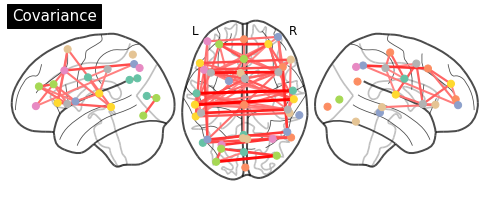

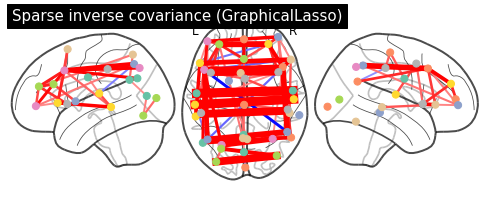

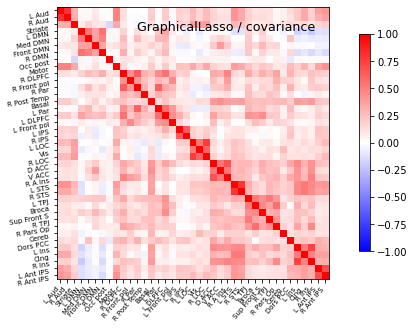

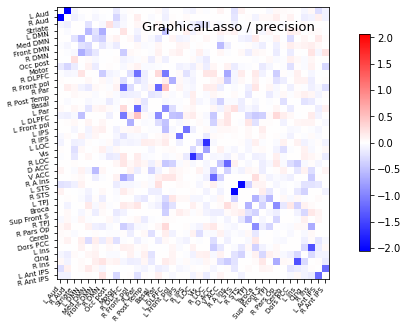

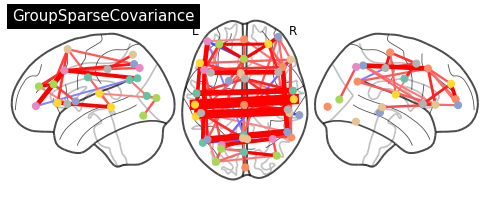

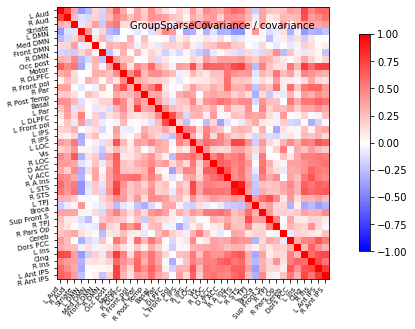

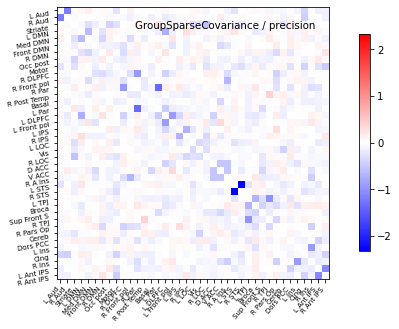

In [10]:
atlas_img = msdl_atlas_dataset.maps
atlas_region_coords = plotting.find_probabilistic_atlas_cut_coords(atlas_img)
labels = msdl_atlas_dataset.labels

plotting.plot_connectome(gl.covariance_,
                         atlas_region_coords, edge_threshold='90%',
                         title="Covariance",
                         display_mode="lzr")
plotting.plot_connectome(-gl.precision_, atlas_region_coords,
                         edge_threshold='90%',
                         title="Sparse inverse covariance (GraphicalLasso)",
                         display_mode="lzr",
                         edge_vmax=.5, edge_vmin=-.5)
plot_matrices(gl.covariance_, gl.precision_, "GraphicalLasso", labels)

title = "GroupSparseCovariance"
plotting.plot_connectome(-gsc.precisions_[..., 0],
                         atlas_region_coords, edge_threshold='90%',
                         title=title,
                         display_mode="lzr",
                         edge_vmax=.5, edge_vmin=-.5)
plot_matrices(gsc.covariances_[..., 0],
              gsc.precisions_[..., 0], title, labels)
import numpy as np
import matplotlib.pyplot as plt
plotting.show()



Saving the matrices.

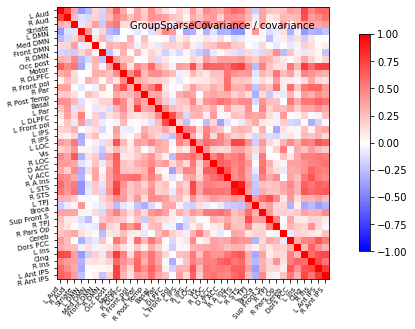

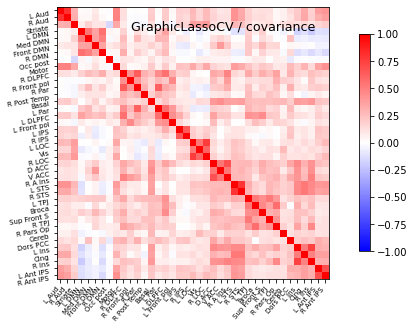

In [11]:
from nilearn import plotting

#1st matrix
cov=gsc.covariances_[..., 0]
title='GroupSparseCovariance'
display=plotting.plot_matrix(cov, cmap=plotting.cm.bwr,
                     vmin=-1, vmax=1, title="%s / covariance" % title,
                     labels=labels)
display.figure.savefig('GSC_covariance_dep.png', dpi=300)
plotting.show()


# 2nd matrix
cov=gl.covariance_
title='GraphicLassoCV'
# Display covariance matrix
display=plotting.plot_matrix(cov, cmap=plotting.cm.bwr,
                     vmin=-1, vmax=1, title="%s / covariance" % title,
                     labels=labels)
display.figure.savefig('GL_covariances_dep.png', dpi=300)

Saving the precision matrix.

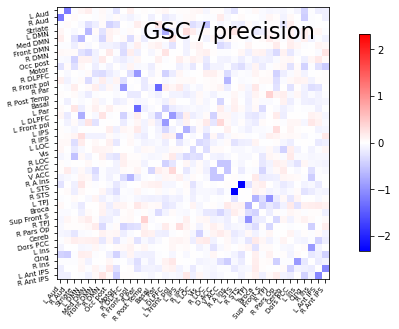

In [12]:
prec = gsc.precisions_[..., 0]
# Put zeros on the diagonal, for graph clarity.
size = prec.shape[0]
prec[list(range(size)), list(range(size))] = 0
span = max(abs(prec.min()), abs(prec.max()))
title='GSC'
# Display precision matrix
display=plotting.plot_matrix(prec, cmap=plotting.cm.bwr,
                     vmin=-span, vmax=span, title="%s / precision" % title,
                     labels=labels)

display.figure.savefig('Precision_dep.png', dpi=300)
plotting.show()

Matrices are nice to see but we look also for the exactly figures and saving the as .csv file.

In [17]:
import pandas as pd
import openpyxl
df=pd.DataFrame(data=gl.covariance_, index=labels, columns=labels)
df.to_csv('GL_covariances_dep.csv')
df.to_excel('GL_covariances_depx.xlsx')
df

,L Aud,R Aud,Striate,L DMN,Med DMN,Front DMN,R DMN,Occ post,Motor,R DLPFC,...,Sup Front S,R TPJ,R Pars Op,Cereb,Dors PCC,L Ins,Cing,R Ins,L Ant IPS,R Ant IPS
L Aud,1.000000,0.798597,0.311369,0.020126,0.028022,0.080498,0.014081,-0.008403,0.481041,0.129070,...,0.131533,0.118058,0.033434,0.058716,0.141267,0.205152,0.328673,0.176284,0.377998,0.408313
R Aud,0.798597,1.000000,0.318436,0.035964,0.036390,0.105700,0.024445,-0.006301,0.487947,0.119610,...,0.139515,0.109687,0.033385,0.061050,0.115625,0.218479,0.338444,0.190555,0.317715,0.373012
Striate,0.311369,0.318436,1.000000,0.074828,0.172708,0.096119,0.094376,-0.152740,0.343312,0.080067,...,0.102034,0.132433,0.050808,0.122955,0.152385,0.119196,0.145038,0.105493,0.162783,0.202406
L DMN,0.020126,0.035964,0.074828,1.000000,0.525256,0.360829,0.562377,0.040643,0.026517,0.172771,...,0.194160,0.018377,-0.009607,-0.054098,0.024442,-0.176804,-0.119470,-0.210249,-0.121566,-0.130641
Med DMN,0.028022,0.036390,0.172708,0.525256,1.000000,0.372645,0.507807,-0.024333,0.046650,0.261306,...,0.140689,0.090776,0.002580,-0.017239,0.247423,-0.071507,-0.055468,-0.082465,-0.070908,-0.079136
Front DMN,0.080498,0.105700,0.096119,0.360829,0.372645,1.000000,0.357647,0.079602,0.125842,0.212227,...,0.280557,0.149762,0.163063,0.006443,0.038734,0.028853,-0.020334,0.014629,-0.053709,-0.042095
R DMN,0.014081,0.024445,0.094376,0.562377,0.507807,0.357647,1.000000,0.032644,0.031379,0.313588,...,0.164104,0.089041,0.084598,-0.030214,0.148575,-0.126284,-0.088196,-0.148346,-0.087649,-0.143642
Occ post,-0.008403,-0.006301,-0.152740,0.040643,-0.024333,0.079602,0.032644,1.000000,-0.030538,0.114311,...,0.080393,-0.004935,0.071089,0.059607,-0.082976,-0.019324,0.005654,-0.011347,-0.018482,-0.017379
Motor,0.481041,0.487947,0.343312,0.026517,0.046650,0.125842,0.031379,-0.030538,1.000000,0.149832,...,0.216382,0.179939,0.093055,0.109373,0.268521,0.182224,0.293455,0.147676,0.353831,0.432115
R DLPFC,0.129070,0.119610,0.080067,0.172771,0.261306,0.212227,0.313588,0.114311,0.149832,1.000000,...,0.318859,0.245616,0.365569,0.091681,0.302731,0.163989,0.135900,0.245253,0.209637,0.173442


In [18]:
import pandas as pd
df=pd.DataFrame(data=gsc.covariances_[..., 0], index=labels, columns=labels)
df.to_csv('GSC_covariances_dep.csv')
df.to_excel('GSC_covariances_depx.xlsx')
df

,L Aud,R Aud,Striate,L DMN,Med DMN,Front DMN,R DMN,Occ post,Motor,R DLPFC,...,Sup Front S,R TPJ,R Pars Op,Cereb,Dors PCC,L Ins,Cing,R Ins,L Ant IPS,R Ant IPS
L Aud,1.000000,0.723993,0.335534,-0.391873,-0.266693,0.159144,-0.161126,0.318132,0.615321,0.316602,...,0.362924,0.242860,0.203172,0.239224,0.389446,0.330741,0.726887,0.473729,0.582107,0.597644
R Aud,0.723993,1.000000,0.258816,-0.124548,-0.152426,0.158846,-0.184140,0.270117,0.470894,0.390148,...,0.364295,0.081725,0.128765,0.285067,0.252798,0.274887,0.689287,0.383565,0.446432,0.555875
Striate,0.335534,0.258816,1.000000,-0.100689,0.179182,0.370991,-0.207750,0.460856,0.534865,0.127694,...,0.348141,0.071062,-0.002886,0.347878,-0.002718,0.257796,0.372401,0.368429,0.331933,0.376441
L DMN,-0.391873,-0.124548,-0.100689,1.000000,0.402709,-0.054991,0.164837,-0.274704,-0.346026,-0.002294,...,0.039678,-0.130282,-0.077344,0.128919,-0.312697,-0.056373,-0.403098,-0.291883,-0.335421,-0.230883
Med DMN,-0.266693,-0.152426,0.179182,0.402709,1.000000,0.108623,0.287465,-0.155881,-0.039888,0.003539,...,-0.034046,-0.250336,-0.047933,0.065559,-0.141205,0.125765,-0.191081,0.109152,-0.010307,0.003584
Front DMN,0.159144,0.158846,0.370991,-0.054991,0.108623,1.000000,0.029732,0.292180,0.270184,0.324467,...,0.149203,-0.016972,-0.093003,0.022880,-0.092625,-0.041219,0.190689,0.127897,0.021036,0.068663
R DMN,-0.161126,-0.184140,-0.207750,0.164837,0.287465,0.029732,1.000000,-0.237601,-0.039638,0.302177,...,-0.144307,0.216180,0.441628,-0.269782,0.241958,0.068973,-0.089262,0.097530,0.036577,-0.232277
Occ post,0.318132,0.270117,0.460856,-0.274704,-0.155881,0.292180,-0.237601,1.000000,0.373314,0.246340,...,0.344706,0.289952,0.167907,0.094994,0.017284,0.112110,0.350210,0.167072,0.058340,0.176738
Motor,0.615321,0.470894,0.534865,-0.346026,-0.039888,0.270184,-0.039638,0.373314,1.000000,0.436821,...,0.499459,0.230056,0.119525,0.131572,0.531655,0.277823,0.776233,0.570483,0.737922,0.745511
R DLPFC,0.316602,0.390148,0.127694,-0.002294,0.003539,0.324467,0.302177,0.246340,0.436821,1.000000,...,0.276209,0.216335,0.530285,0.257033,0.369421,0.124911,0.480172,0.421895,0.349252,0.292561


In [15]:
from PIL import Image
import urllib.request

URL = 'https://st.depositphotos.com/1431107/1631/i/950/depositphotos_16317151-stock-photo-well-done-illustration.jpg'

with urllib.request.urlopen(URL) as url:
    with open('temp.jpg', 'wb') as f:
        f.write(url.read())

img = Image.open('temp.jpg')

img.show()